<a href="https://colab.research.google.com/github/Subhansini/python-Projects/blob/main/Recognition_of_Objects_with_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE REQUIRED



In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
import keras

LOADING AND SPLITTING THE DATA



In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [ ]:
print(X_train[0].shape)

(32, 32, 3)


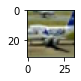

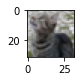

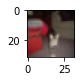

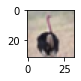

In [ ]:
for i in range(332,336):
    plt.subplot(120+ 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()

PREPROSESSING THE DATA

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
n_classes = 10

print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


BUILDING THE MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
#output layer
model.add(Dense(10, activation='softmax'))

#compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model
model.fit(X_train, Y_train, batch_size=128, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
391/391 [==============================] - 608s 2s/step - loss: 1.8389 - accuracy: 0.3109 - val_loss: 1.1816 - val_accuracy: 0.5852
Epoch 2/20
391/391 [==============================] - 587s 2s/step - loss: 1.1487 - accuracy: 0.5960 - val_loss: 0.9285 - val_accuracy: 0.6842
Epoch 3/20
391/391 [==============================] - 589s 2s/step - loss: 0.9304 - accuracy: 0.6750 - val_loss: 0.7989 - val_accuracy: 0.7223
Epoch 4/20
391/391 [==============================] - 589s 2s/step - loss: 0.8166 - accuracy: 0.7137 - val_loss: 0.7610 - val_accuracy: 0.7374
Epoch 5/20
391/391 [==============================] - 593s 2s/step - loss: 0.7296 - accuracy: 0.7454 - val_loss: 0.7324 - val_accuracy: 0.7445
Epoch 6/20
391/391 [==============================] - 593s 2s/step - loss: 0.6544 - accuracy: 0.7690 - val_loss: 0.6896 - val_accuracy: 0.7594
Epoch 7/20
391/391 [==============================] - 591s 2s/step - loss: 0.6129 - accuracy: 0.7869 - val_loss: 0.6677 - val_accuracy: 0.7664

PREDICTING

In [ ]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck'
        ]

#zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

#generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

#make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 1s 557ms/step


In [ ]:
print (predictions)

[[3.69712211e-07 8.82670292e-09 6.18254719e-03 9.78985772e-05
  8.40702891e-01 1.45779736e-02 1.21102476e-05 1.38425976e-01
  1.47752379e-08 2.12835772e-07]
 [1.89362210e-04 2.71228419e-05 5.66925146e-02 1.21473700e-01
  3.00467134e-01 2.86738098e-01 6.61463812e-02 1.66608110e-01
  2.46268261e-04 1.41132984e-03]
 [5.72954946e-07 3.19693572e-06 2.28407167e-04 3.46441462e-04
  1.14501408e-05 3.87772801e-03 9.95516956e-01 1.18564631e-05
  1.97816644e-06 1.48721801e-06]
 [2.01836992e-09 7.26687555e-09 8.31745911e-06 9.88546968e-01
  1.48632517e-03 6.99200726e-04 9.13646352e-03 1.20628800e-04
  4.00966904e-09 2.10183816e-06]
 [1.64022088e-10 9.99995351e-01 1.51786981e-15 2.95107801e-17
  1.17342344e-17 1.62801100e-19 1.08022620e-15 6.16387199e-16
  6.49150138e-08 4.63558308e-06]
 [1.91168570e-09 9.99998689e-01 1.54493439e-14 1.28839674e-13
  4.41358122e-15 2.70097140e-14 1.18247350e-12 2.44894801e-16
  4.40537171e-08 1.28605666e-06]
 [2.12320173e-03 1.45889542e-04 1.46688251e-02 8.18983018e

In [ ]:
for image in predictions:
    print(np.sum(image))

1.0
1.0000001
1.0000001
1.0
1.0
1.0
1.0
1.0
1.0


In [ ]:
class_result = np.argmax(predictions,axis=-1)
print(class_result)

[4 4 6 3 1 1 3 6 8]


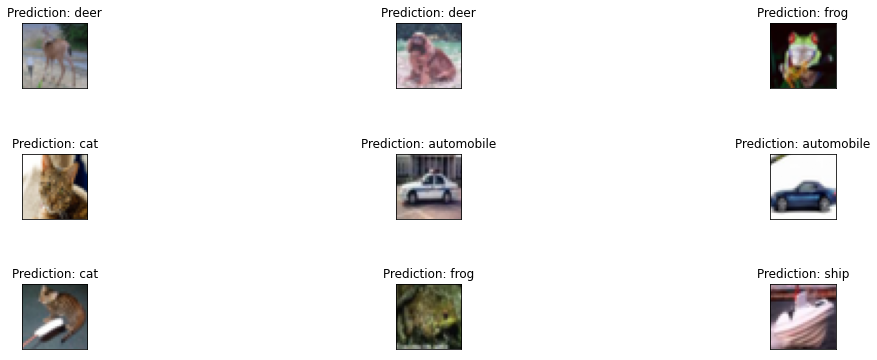

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)

    #plot the image
    axs[i].imshow(img)

 #show the plot
plt.show()